In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [88]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Датасет - Реальный набор данных о розничных онлайн-транзакциях за два года**


*Invoice*: Номер счета-фактуры. Номинальный. 6-значное целое число, уникально назначаемое каждой транзакции. Если этот код начинается с буквы «c», это указывает на отмену.  
*StockCode*: Код продукта (товара). Номинальный. 5-значное целое число, уникально назначаемое каждому отдельному продукту.  
*Description*: Название продукта (товара). Номинальный.  
*Quantity*: Количество каждого продукта (товара) за транзакцию. Числовой.  
*InvoiceDate*: Дата и время выставления счета. Числовой. День и время, когда была создана транзакция.  
*UnitPrice*: Цена за единицу. Числовой. Цена продукта за единицу в фунтах стерлингов (Â£).  
*Customer ID*: Номер клиента. Номинальный. 5-значное целое число, уникально назначаемое каждому клиенту.  
*Country*: Название страны. Номинальный. Название страны, в которой проживает клиент.

In [89]:
online_retail = pd.read_excel('/content/drive/My Drive/Colab Notebooks/online_retail_II.xlsx')

In [90]:
online_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


# Анализ датасета

In [91]:
online_retail.describe(include=['O'])

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [92]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [93]:
online_retail.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [94]:
online_retail[online_retail.Description.isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524730,538141,22218,NaN,2,2010-12-09 15:58:00,0.0,NaN,United Kingdom
524731,538143,84534B,NaN,1,2010-12-09 15:58:00,0.0,NaN,United Kingdom
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom


In [95]:
# Цена покупки не может быть равным 0

online_retail = online_retail[online_retail.Price > 0.0]


# Уберём все отменённые транзакции

Invoice_without_cancel = []
for inv in online_retail.Invoice:
  if type(inv) == int:
    Invoice_without_cancel.append(inv)

online_retail = online_retail.loc[online_retail.Invoice.isin(Invoice_without_cancel)]

In [96]:
online_retail.loc[online_retail.Quantity <= 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [97]:
# Так мы избавились от неизвесных Description и отрицательных значений Quantity

online_retail.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,103901
Country,0


In [98]:
# Уникальных значений

online_retail.nunique()

,0
Invoice,20951
StockCode,4251
Description,4534
Quantity,406
InvoiceDate,19467
Price,1345
Customer ID,4312
Country,40


In [99]:
counts_Invoice = online_retail.Invoice.value_counts()
counts_stockCode = online_retail.StockCode.value_counts()
counts_discription = online_retail.Description.value_counts()
counts_Customer_ID = online_retail['Customer ID'].value_counts()

In [100]:
# Наиболее часто покупали у фирм

counts_Invoice.head(5)

,count
Invoice,
537434,675
538071,651
537638,601
537237,597
536876,593


In [101]:
# Наиболее часто тратились

counts_Customer_ID.head(5)

,count
Customer ID,
14911.0,5570
17841.0,5043
14606.0,3866
14156.0,2648
12748.0,2633


In [102]:
# Страны топ клиентов

online_retail.loc[online_retail['Customer ID'].isin(counts_Customer_ID.head(5).index)][['Country', 'Customer ID']].drop_duplicates()

,Country,Customer ID
440,EIRE,14911.0
1000,EIRE,14156.0
6155,United Kingdom,17841.0
7335,United Kingdom,14606.0
12024,United Kingdom,12748.0


In [103]:
# Наиболее часто брали продукты с данными кодами

counts_stockCode.head(5)

,count
StockCode,
85123A,3421
22423,2044
85099B,2012
21212,1920
21232,1713


In [104]:
# Наиболее часто покупали с такими наименованиями продукты

counts_discription.head(5)

,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,3455
REGENCY CAKESTAND 3 TIER,2044
STRAWBERRY CERAMIC TRINKET BOX,1713
PACK OF 72 RETRO SPOT CAKE CASES,1456
ASSORTED COLOUR BIRD ORNAMENT,1449


In [105]:
# Расширим набор данных, добавив колонки часа и месяца

InvoiceDate_hours = [i.hour for i in online_retail.InvoiceDate]
InvoiceDate_month = [i.month for i in online_retail.InvoiceDate]
online_retail = online_retail.assign(Invoice_hours = InvoiceDate_hours)
online_retail = online_retail.assign(Invoice_month = InvoiceDate_month)

In [106]:
# Создание колонки траты

expense = online_retail.Price * online_retail.Quantity
online_retail = online_retail.assign(Expense = expense)


# Информация по тратам

online_retail.Expense.describe()

,Expense
count,511565.000000
mean,20.145811
std,90.918823
min,0.001000
25%,4.200000
50%,10.140000
75%,17.700000
max,25111.090000


<BarContainer object of 14 artists>

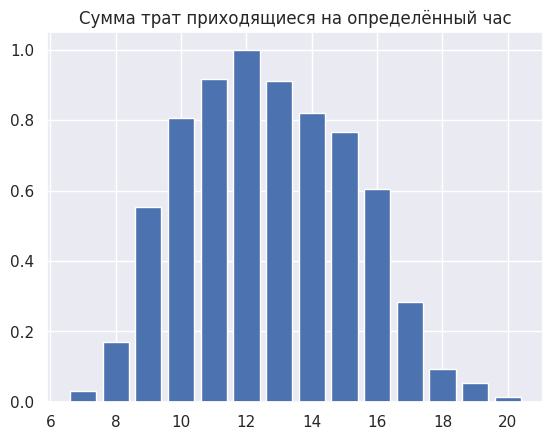

In [107]:
plt.title("Сумма трат приходящиеся на определённый час")
expense_sum_hours = online_retail.groupby('Invoice_hours').Expense.sum()
expense_sum_hours = expense_sum_hours/expense_sum_hours.max()
plt.bar(expense_sum_hours.index, expense_sum_hours.values)

<BarContainer object of 12 artists>

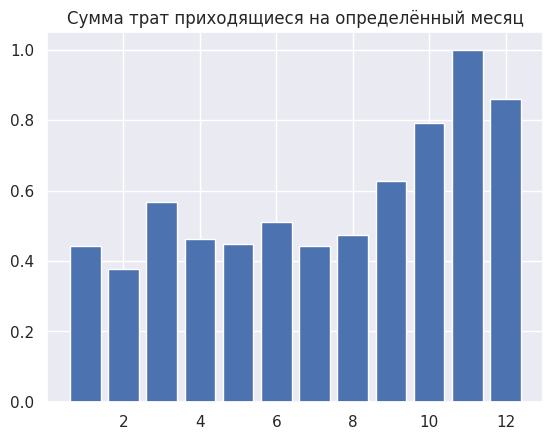

In [108]:
plt.title("Сумма трат приходящиеся на определённый месяц")
expense_sum_month = online_retail.groupby('Invoice_month').Expense.sum()
expense_sum_month = expense_sum_month/expense_sum_month.max()
plt.bar(expense_sum_month.index, expense_sum_month.values)

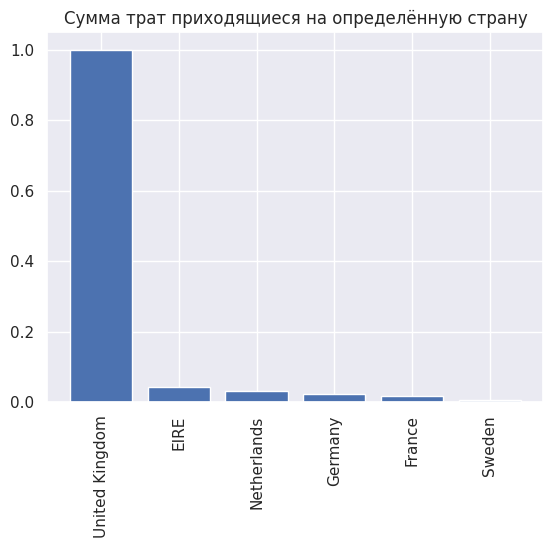

In [109]:
plt.title("Сумма трат приходящиеся на определённую страну")
expense_sum_country = online_retail.groupby('Country').Expense.sum()
expense_sum_country = expense_sum_country.sort_values(ascending=False).head(6)/expense_sum_country.max()
plt.bar(expense_sum_country.index, expense_sum_country.values)
plt.xticks(rotation=90)
plt.show()

<BarContainer object of 10 artists>

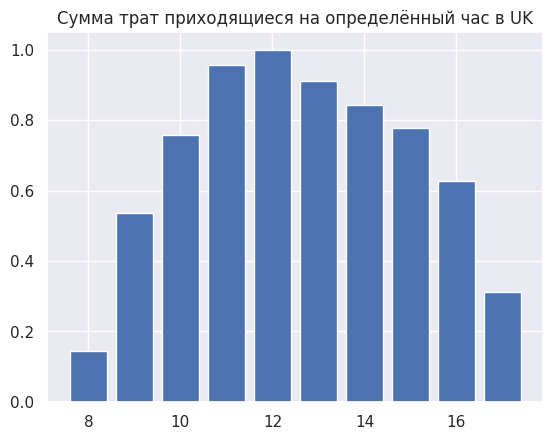

In [110]:
plt.title("Сумма трат приходящиеся на определённый час в UK")
expense_sum_country = online_retail.loc[online_retail.Country == 'United Kingdom'].groupby('Invoice_hours').Expense.sum()
expense_sum_country = expense_sum_country.sort_values(ascending=False).head(10)/expense_sum_country.max()
plt.bar(expense_sum_country.index, expense_sum_country.values)

<BarContainer object of 10 artists>

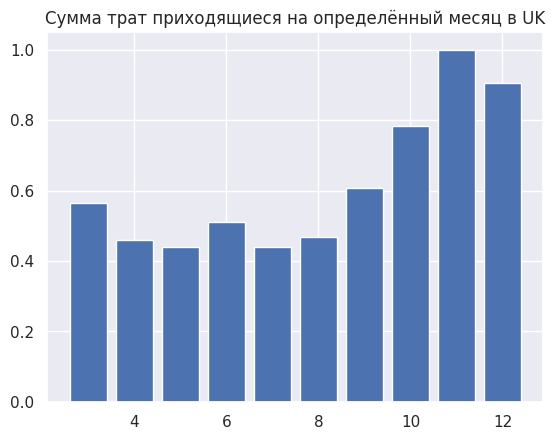

In [111]:
plt.title("Сумма трат приходящиеся на определённый месяц в UK")
expense_sum_country = online_retail.loc[online_retail.Country == 'United Kingdom'].groupby('Invoice_month').Expense.sum()
expense_sum_country = expense_sum_country.sort_values(ascending=False).head(10)/expense_sum_country.max()
plt.bar(expense_sum_country.index, expense_sum_country.values)

<BarContainer object of 10 artists>

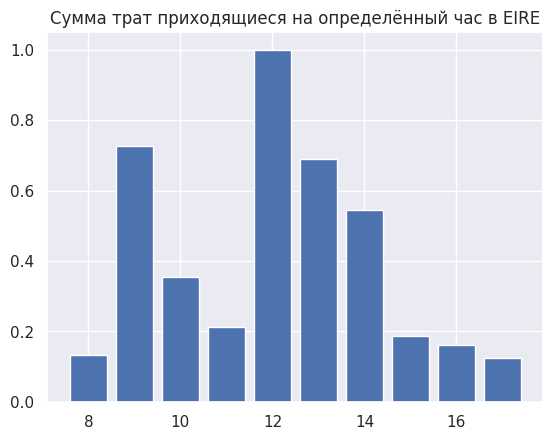

In [112]:
plt.title("Сумма трат приходящиеся на определённый час в EIRE")
expense_sum_country = online_retail.loc[online_retail.Country == 'EIRE'].groupby('Invoice_hours').Expense.sum()
expense_sum_country = expense_sum_country.sort_values(ascending=False).head(10)/expense_sum_country.max()
plt.bar(expense_sum_country.index, expense_sum_country.values)

<BarContainer object of 10 artists>

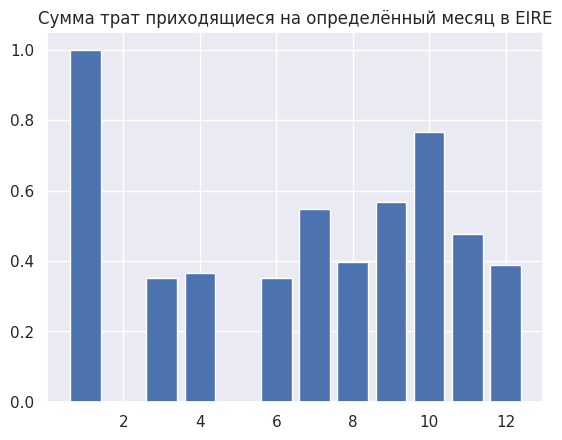

In [113]:
plt.title("Сумма трат приходящиеся на определённый месяц в EIRE")
expense_sum_country = online_retail.loc[online_retail.Country == 'EIRE'].groupby('Invoice_month').Expense.sum()
expense_sum_country = expense_sum_country.sort_values(ascending=False).head(10)/expense_sum_country.max()
plt.bar(expense_sum_country.index, expense_sum_country.values)